<a href="https://colab.research.google.com/github/quiescentsam/ML/blob/main/learn_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages (only needed if running in a fresh Colab environment)
!pip install -q matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


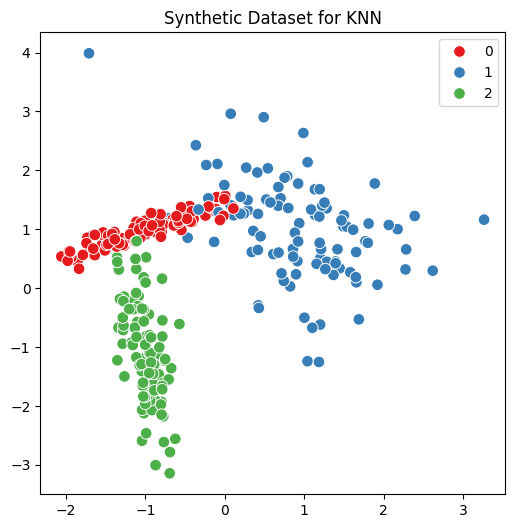

In [4]:
# Create a 2D classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", s=70)
plt.title("Synthetic Dataset for KNN")
plt.show()


In [5]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (important for distance-based models like KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
print(X_train_scaled)
print(X_train)

[[-0.49667573 -1.64028649]
 [-0.47759155 -1.09294617]
 [-0.0122431   0.51374744]
 [-0.77834475 -1.42095678]
 [-0.96972742  0.49606674]
 [-0.79805478  0.41871087]
 [-0.94471684  0.44602418]
 [ 1.44153946  1.56804492]
 [-0.55186711 -1.50847823]
 [ 0.50948124  2.24437908]
 [-0.45487618 -0.87704458]
 [ 1.33968681  0.71601147]
 [-0.09191175  0.93844333]
 [-0.66738424  0.64976163]
 [-0.01982199  0.77730938]
 [-0.79837762  0.41734171]
 [ 1.95785415  0.03259039]
 [-0.37269829 -1.81233713]
 [ 0.85043118 -0.46624009]
 [-0.67058334  0.61969319]
 [ 1.19522581  1.37215038]
 [-0.32071285 -1.55603167]
 [ 0.21322025  1.52933229]
 [ 1.16233557  1.35187934]
 [-0.52918173  0.75160361]
 [-0.47219169 -0.844662  ]
 [-0.52731191 -0.97823802]
 [-0.51522738 -2.2146029 ]
 [-0.97606712  0.54179821]
 [-0.5363082  -1.56192292]
 [-0.72993738 -0.35022404]
 [ 1.58350454  0.81001955]
 [-0.71144444  0.561158  ]
 [-0.33561607 -1.81334667]
 [-0.6774117  -0.98282038]
 [-0.12245621  0.74714148]
 [-0.72618552  0.4904599 ]
 

In [6]:
# Train a KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[26  1  0]
 [ 3 35  0]
 [ 2  0 23]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.97      0.92      0.95        38
           2       1.00      0.92      0.96        25

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



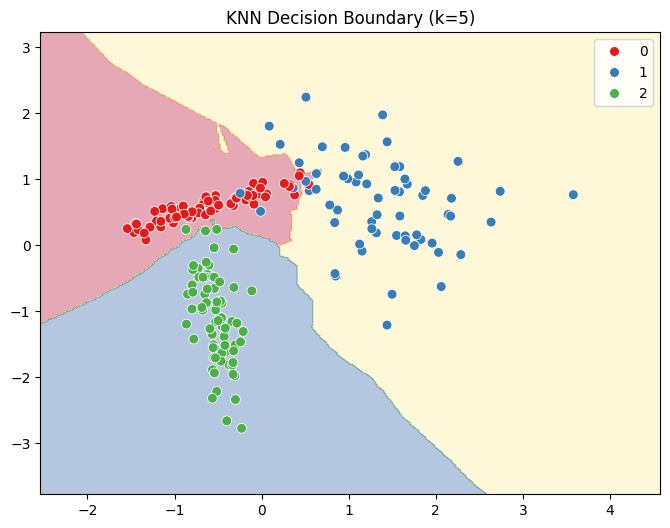

In [10]:
# Create a mesh grid for plotting
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for mesh points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette="Set1", s=50)
plt.title("KNN Decision Boundary (k=5)")
plt.show()


In [11]:
pip install spark-annoy


ERROR: Could not find a version that satisfies the requirement spark-annoy (from versions: none)
ERROR: No matching distribution found for spark-annoy
